In [73]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE
from umap import UMAP
from  trimap import TRIMAP
from pacmap import PaCMAP
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
import json

# Загрузка датасета

In [5]:
names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']
with open('../config.json') as file:
    file_data = json.load(file)
hepatitis_data_path = file_data['hepatitis_data_path']
print(hepatitis_data_path)
hepatitis = pd.read_csv(hepatitis_data_path, header = None, names = names)
# hepatitis = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data', header = None, names = names)
hepatitis.keys() 

D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data


Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [6]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


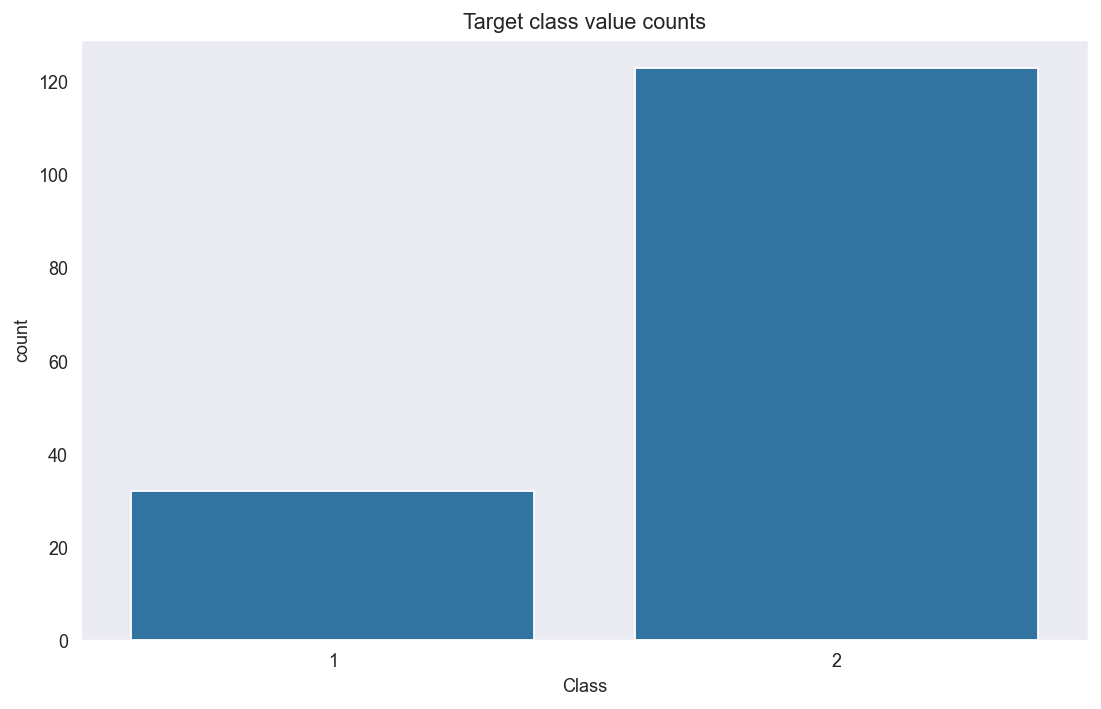

Class
2    123
1     32
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(10, 6), dpi=130)
plt.grid()
sns.countplot(x=hepatitis['Class'])
plt.title("Target class value counts")
plt.show()
print(hepatitis['Class'].value_counts())

In [8]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [9]:
hepatitis.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


# Замена пропущенных значений средними

In [10]:
Bilirubin = hepatitis['Bilirubin']
bilirubin_mean = round(Bilirubin[Bilirubin != '?'].astype(float).mean(),2)
print('Bilirubin mean = ',bilirubin_mean)

Alk_Phosphate = hepatitis['Alk Phosphate']
Alk_Phosphate_mean = Alk_Phosphate[Alk_Phosphate != '?'].astype(int).mean().astype(int)
print('Alk_Phosphate mean = ', Alk_Phosphate_mean)

Sgot = hepatitis['Sgot']
Sgot_mean = Sgot[Sgot != '?'].astype(int).mean().astype(int)
print('Sgot mean = ',Sgot_mean)

Albumin = hepatitis['Albumin']
Albumin_mean = round(Albumin[Albumin != '?'].astype(float).mean(),1)
print('Albumin mean = ',Albumin_mean)

Protime = hepatitis['Protime']
Protime_mean = Protime[Protime != '?'].astype(int).mean().astype(int)
print('Protime mean = ',Protime_mean)

hepatitis = hepatitis.replace({'Steroid' : {'?': 3}, 'Fatigue' : {'?': 3}, 'Malaise' : {'?': 3},  'Anorexia' : {'?': 3}, 'Liver Big' : {'?': 3}, 'Liver Firm' : {'?': 3}, 'Spleen Palpable' : {'?': 3}, 'Spiders' : {'?': 3},  'Ascites' : {'?': 3}, 'Varices' : {'?': 3}, 'Bilirubin' : {'?': bilirubin_mean},  'Alk Phosphate' : {'?': Alk_Phosphate_mean}, 'Sgot' : {'?': Sgot_mean},  'Albumin' : {'?': Albumin_mean}, 'Protime' : {'?': Protime_mean}})
hepatitis

Bilirubin mean =  1.43
Alk_Phosphate mean =  105
Sgot mean =  85
Albumin mean =  3.8
Protime mean =  61


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [11]:
for column in hepatitis.columns:
    if column not in ['Bilirubin', 'Albumin']:
        hepatitis[column] = hepatitis[column].astype('int')
    else:
        hepatitis[column] = hepatitis[column].astype('float')
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver Big        155 non-null    int64  
 9   Liver Firm       155 non-null    int64  
 10  Spleen Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

In [12]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


# Разделение на обучающую и тестовую выборки

In [18]:
# hepatitis_features = hepatitis.iloc[:, 1:]
# hepatitis_targets = hepatitis.iloc[:, 0]
X = hepatitis.iloc[:, 1:] # hepatitis_features
y = hepatitis.iloc[:, 0] # hepatitis_targets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

# Нормируем данные

In [29]:
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Обучение и применение моделей SVM 

{'C': 2.5, 'gamma': 0.01, 'kernel': 'sigmoid'}
SVC(C=2.5, gamma=0.01, kernel='sigmoid')
              precision    recall  f1-score   support

           1       0.80      0.40      0.53        10
           2       0.82      0.97      0.89        29

    accuracy                           0.82        39
   macro avg       0.81      0.68      0.71        39
weighted avg       0.82      0.82      0.80        39



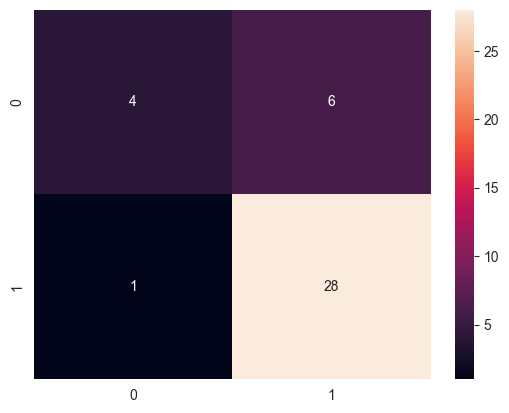

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# classifier = SVC(kernel='linear')
# classifier.fit(X_train, y_train)
param_grid = {'C': [0.1, 1, 1.5, 2.5, 5, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.15, 0.01, 0.05,  0.001, 0.0001], 
              'kernel': ['linear','rbf','poly','sigmoid']}  
grid = GridSearchCV(SVC(), param_grid, verbose = False, scoring='accuracy') # refit = True
grid.fit(X_train, y_train) 
# выводим лучшие параметры
print(grid.best_params_) 
print(grid.best_estimator_) 
# применяем на тестовых данных
classifier = grid.best_estimator_
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels= grid.classes_)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')


In [100]:
from sklearn.inspection import DecisionBoundaryDisplay
def plot_training_data_with_decision_boundary(kernel,X, y):
    # clf = SVC(**clf_params).fit(X, y)
    clf = SVC(kernel=kernel).fit(X, y)
    print("X = ".format(X))
    print("y = ".format(y))
    # Settings for plotting
    _, ax = plt.subplots(figsize=(5, 5))
    x_min, x_max, y_min, y_max = 10, 17,-7 , 2
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    # scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries in SVC")

    

    fig = plt.show()
    plt.close()
    return None

X = 
y = 


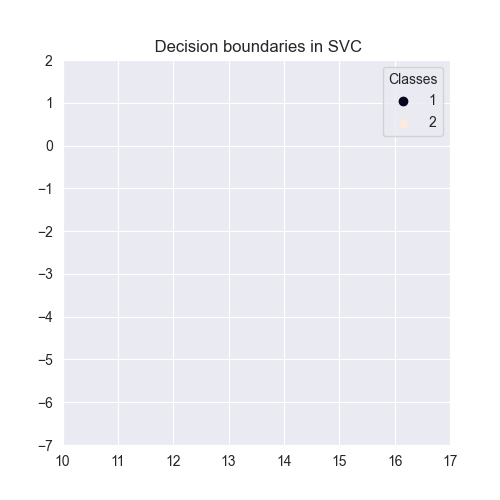

In [103]:
umap_kwargs = {}
X_reduced = UMAP(**umap_kwargs).fit_transform(X_train)
# print(MaxAbsScaler().fit_transform(X_reduced))
plot_training_data_with_decision_boundary('rbf', X_2_scaled, y_train)
# for kernel in ['linear','rbf','poly','sigmoid']:
#     X_2_scaled = MaxAbsScaler().fit_transform(X_reduced)
#     plot_training_data_with_decision_boundary(kernel, X_2_scaled, y_train)
# plot_training_data_with_decision_boundary(classifier,X_reduced, y_train)
# for kernel in ['linear','rbf','poly','sigmoid']:
#     for scaler in [MaxAbsScaler,
#     MinMaxScaler,
#     Normalizer,
#     PowerTransformer,
#     QuantileTransformer,
#     RobustScaler,
#     StandardScaler,
#     minmax_scale]:
#         X_2_scaled = scaler().fit_transform(X_reduced)
#         plot_training_data_with_decision_boundary(grid.best_params_, X_2_scaled, y_train)

0.8461538461538461
              precision    recall  f1-score   support

           1       0.83      0.50      0.62        10
           2       0.85      0.97      0.90        29

    accuracy                           0.85        39
   macro avg       0.84      0.73      0.76        39
weighted avg       0.84      0.85      0.83        39



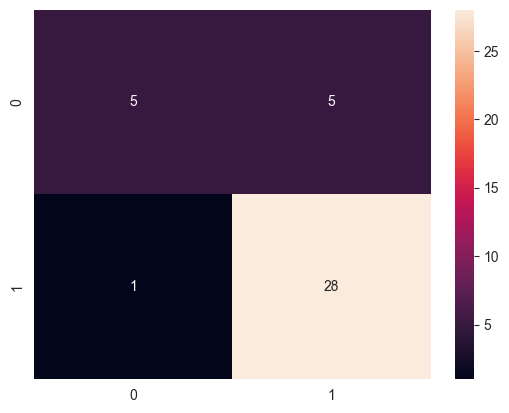

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')
print(classification_report(y_test, y_pred))

# Визуализация классификации

In [24]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# plotting the fgiure
plt.figure(figsize = (7,7))
# assigning the input values
X_set, y_set = X_train, y_train
# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

ValueError: X has 2 features, but SVC is expecting 19 features as input.

<Figure size 700x700 with 0 Axes>

# Нелинейный классификатор. Радиально-базисная функция ядра

In [25]:
classifier1 = SVC(kernel='rbf')
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8461538461538461
